### Predicting House Prices using Regression Models

**1. Introduction**

**Project Objective**

To build a regression model that can predict house prices based on various features such as building area, number of rooms, location, and other attributes. This model aims to provide accurate price estimates that can be used by real estate agents or individuals who want to buy/sell a house.

**Problem to be Solved**

House prices are influenced by many factors, and it is often difficult for individuals to assess whether the price of a house is reasonable. A data-driven prediction model helps provide decisions based on facts.

**Dataset**

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

Data Reference Link: https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [115]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st
import joblib

**2. Data Collection and Understanding**

In [8]:
# Load Dataset
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
# Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [133]:
# Features
df.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

| **Feature** | **Description**                                                                                 |
|-------------|-------------------------------------------------------------------------------------------------|
| CRIM        | Crime rate per capita.                                                                          |
| ZN          | Proportion of residential land zoned for large lots.                                            |
| INDUS       | Proportion of non-retail business acres per town.                                               |
| CHAS        | Charles River dummy variable (1 if tract bounds river; 0 otherwise).                            |
| NOX         | Nitrogen oxides concentration (parts per 10 million).                                           |
| RM          | Average number of rooms per dwelling.                                                           |
| AGE         | Proportion of owner-occupied units built before 1940.                                           |
| DIS         | Weighted distances to five Boston employment centers.                                           |
| RAD         | Index of accessibility to radial highways.                                                      |
| TAX         | Full-value property tax rate per $10,000.                                                       |
| PTRATIO     | Pupil-teacher ratio by town.                                                                    |
| B           | Proportion of residents of African American descent.                                            |
| LSTAT       | Percentage of lower status population.                                                          |
| MEDV        | Median value of owner-occupied homes in $1000s (target variable).                               |


**3. Data Preprocessing**

Before building a model, we need to make sure the data is ready to use. Here are some steps that need to be taken:

**Checking Missing Values and Outliers**

Make sure there are no missing values ​​and check for any unusual data (outliers) that need to be handled.

In [28]:
# Statistic Descriptive
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
# Missing Value Check
missing_value = df.isnull().sum()
missing_value

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
# Replace Missing Values with Average
df = df.fillna(df.mean())

In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [27]:
# Checking Outliers with Box Plot
for column in df.columns:
    fig = px.box(df, y=column, title=f"Boxplot for {column}")
    fig.show()

**Feature Selection**

**A. Correlation Analysis**

Used to measure the relationship between a numeric feature and a target.

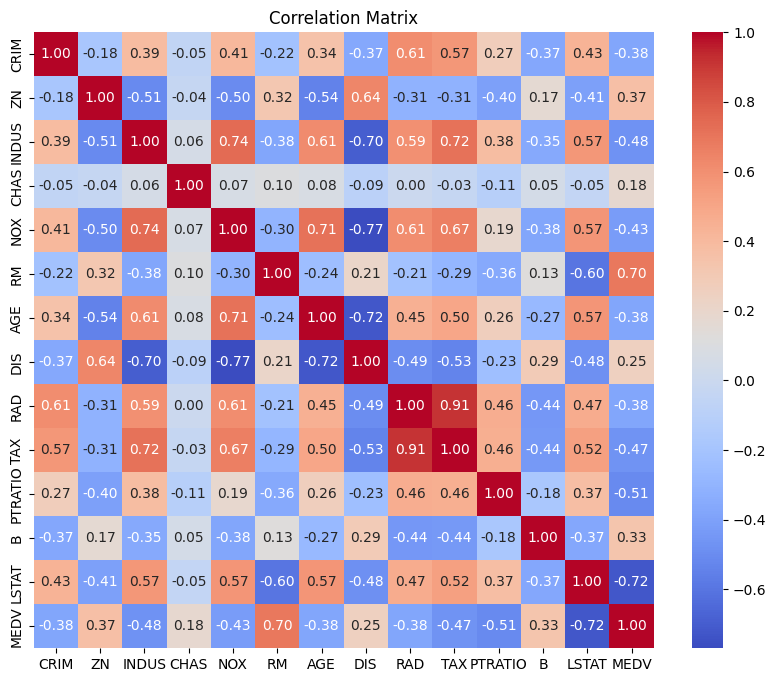

MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


In [30]:
# Correlation between features
correlation_matrix = df.corr()

# Visualizzation of Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Showing features with high correlation to MEDV
correlation_with_target = correlation_matrix['MEDV'].sort_values(ascending=False)
print(correlation_with_target)


In [41]:
correlation_with_target = abs(correlation_with_target).sort_values(ascending=False)
top_10_features = correlation_with_target[1:11]
top_10_features

LSTAT      0.721975
RM         0.695360
PTRATIO    0.507787
INDUS      0.478657
TAX        0.468536
NOX        0.427321
RAD        0.381626
AGE        0.380223
CRIM       0.379695
ZN         0.365943
Name: MEDV, dtype: float64

**B. Feature Importance (Tree=Based Models)**

Tree-based algorithms (such as Random Forest) can calculate the importance of features to the target automatically.

    Feature  Importance
5        RM    0.494272
12    LSTAT    0.302265
7       DIS    0.068127
0      CRIM    0.042576
4       NOX    0.023820
10  PTRATIO    0.017730
9       TAX    0.014326
6       AGE    0.012498
11        B    0.011274
2     INDUS    0.006456
8       RAD    0.004205
1        ZN    0.001300
3      CHAS    0.001151


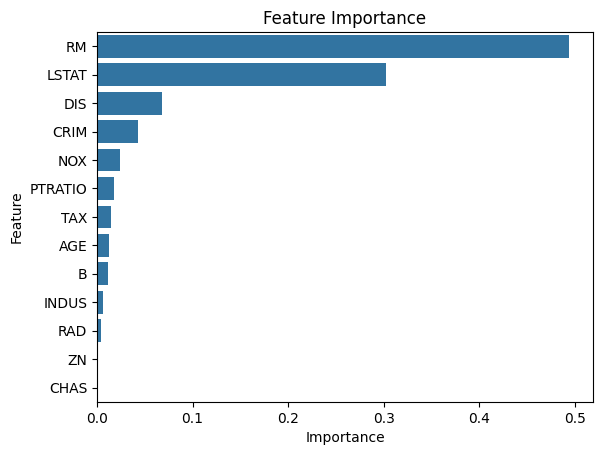

In [116]:
# Creating a random forest model
X = df.drop('MEDV', axis=1)
y = df['MEDV']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Importance of features
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Visualization
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()


Based on several feature selection methods that we have done, we divide the model testing based on 2 categories of feature selection.
1. Correlation: LSTAT, RM, PTRATIO, INDUS, TAX, NOX, RAD, AGE, CRIM, ZN
2. Feature Importance: RM, LSTAT, DIS, CRIM, NOX, PTRATIO, TAX, AGE, B, INDUS

**Feature Scaling**

After feature selection, the next step is feature scaling. Regression is often sensitive to feature scale. Therefore, we need to scale the numeric features to ensure that all features have a uniform scale.

In [117]:
# Separate Feature and Target
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
X_scaled

array([[-0.42232846,  0.29644292, -1.31101039, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.41986984, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.41987219, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.41595175, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.41023216, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.41751548, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -0.69020355]])

**Split the Data into Training Data and Testing Data**

We need to split the dataset into training and testing data to evaluate the model performance.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**4. Model Development**

**Building a House Price Prediction Model**

Now we can build a model using **Linear Regression** as the base model and **Polynomial Regression** for comparison.

**A. Linear Regression Model**

In [120]:
# Model Inisialization
modelA = LinearRegression()

# Model Training
modelA.fit(X_train, y_train)

# House Prices Prediction
y_pred = modelA.predict(X_test)

In [121]:
# Model Evaluation using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 25.017672023842852
R-squared: 0.658852019550812


In [122]:
# Visualisasi Actual vs Predicted
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'},
                 title="Actual vs Predicted House Prices")
fig.update_traces(marker=dict(size=7, color='green'))
fig.show()

**B. Polynomial Regression Model**

In [123]:
# Prepare Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Creating Model
modelB = LinearRegression()
modelB.fit(X_poly, y_train)

# Data Test Transformation
X_test_poly = poly.transform(X_test)

# House Prices Prediction
y_pred_poly = modelB.predict(X_test_poly)

In [124]:
# Model Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R-squared: {r2_poly}")

Polynomial Mean Squared Error: 17.43599594387423
Polynomial R-squared: 0.7622378773810768


In [125]:
# Visualisasi Actual vs Predicted
fig = px.scatter(x=y_test, y=y_pred_poly, labels={'x': 'Actual Price', 'y': 'Predicted Price'},
                 title="Actual vs Predicted House Prices")
fig.update_traces(marker=dict(size=7, color='green'))
fig.show()

**Show the Comparison using Plotly Scatter Plot**

In [126]:
# Linear Regression Scatter Plot
scatter_linear = go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    marker=dict(color='blue'),
    name='Linear Regression'
)

# Polynomial Regression Scatter Plot
scatter_poly = go.Scatter(
    x=y_test,
    y=y_pred_poly,
    mode='markers',
    marker=dict(color='red'),
    name='Polynomial Regression'
)

# Graph Layout
layout = go.Layout(
    title='Actual vs Predicted Prices',
    xaxis=dict(title='Actual Prices'),
    yaxis=dict(title='Predicted Prices'),
    legend=dict(title="Regression Types"),
)

# Figure
fig = go.Figure(data=[scatter_linear, scatter_poly], layout=layout)
fig.show()


In [127]:
# Comparison
results = pd.DataFrame({
    'MEDV Actual': y_test.values,
    'MEDV Predicted_Linear Regression': y_pred,
    'MEDV Predicted_Polynomial Regression' : y_pred_poly
})


In [128]:
# Show the Dataframe
results

,MEDV Actual,MEDV Predicted_Linear Regression,MEDV Predicted_Polynomial Regression
0,23.6,29.143250,26.280783
1,32.4,36.535668,37.962610
2,13.6,14.492513,15.375019
3,22.8,25.081110,21.603455
4,16.1,18.456092,15.011731
...,...,...,...
97,17.9,0.028734,4.699895
98,9.6,13.537938,11.205013
99,17.2,16.097139,15.664113
100,22.5,22.795804,23.630220


In [129]:
results.describe()

,MEDV Actual,MEDV Predicted_Linear Regression,MEDV Predicted_Polynomial Regression
count,102.000000,102.000000,102.000000
mean,21.488235,21.129000,21.190301
std,8.605804,8.229994,8.802061
min,5.000000,-5.674985,4.699895
25%,17.125000,16.435735,15.447293
50%,20.150000,20.961231,19.574941
75%,24.075000,25.425143,25.381478
max,50.000000,43.042849,52.330642


**Save Model**

In [130]:
# Menyimpan model ke dalam file
joblib.dump(modelA, 'house_price_model_linear_regression.pkl')
joblib.dump(modelB, 'house_price_model_polynomial_regression.pkl')

['house_price_model_polynomial_regression.pkl']

**Evaluation Model Prediction with All Features**

Based on the comparison results of the two models, we can see that the Polynomial Regression model can produce better prediction results than the Linear Regression model.

The Polynomial Regression model produces slightly better accuracy with a **Mean Squared Error (MSE)** value of **17.43599594387423** and an **R-squared** of **0.7622378773810768**, 

while the Linear Regression Model produces a **Mean Squared Error (MSE)** value of **25.017672023842852** and an R-squared of **0.658852019550812**.

**With Correlation Feature Selection**

Features: LSTAT, RM, PTRATIO, INDUS, TAX, NOX, RAD, AGE, CRIM, ZN

**A. Linear Regression Model**

In [103]:
# Separate Feature and Target
X = df[["LSTAT", "RM", "PTRATIO","INDUS", "TAX", "NOX", "RAD", "AGE", "CRIM", "ZN"]]
y = df["MEDV"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data into Training Data and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Inisialization
modelA = LinearRegression()

# Model Training
modelA.fit(X_train, y_train)

# House Prices Prediction
y_pred = modelA.predict(X_test)

# Model Evaluation using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualisasi Actual vs Predicted
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'},
                 title="Actual vs Predicted House Prices")
fig.update_traces(marker=dict(size=7, color='green'))
fig.show()

Mean Squared Error: 26.803983157857875
R-squared: 0.6344933807756956


**B. Polynomial Regression Model**

In [104]:
# Separate Feature and Target
X = df[["LSTAT", "RM", "PTRATIO","INDUS", "TAX", "NOX", "RAD", "AGE", "CRIM", "ZN"]]
y = df["MEDV"]

# Prepare Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Creating Model
modelB = LinearRegression()
modelB.fit(X_poly, y_train)

# Data Test Transformation
X_test_poly = poly.transform(X_test)

# House Prices Prediction
y_pred_poly = modelB.predict(X_test_poly)

# Model Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R-squared: {r2_poly}")

# Visualisasi Actual vs Predicted
fig = px.scatter(x=y_test, y=y_pred_poly, labels={'x': 'Actual Price', 'y': 'Predicted Price'},
                 title="Actual vs Predicted House Prices")
fig.update_traces(marker=dict(size=7, color='green'))
fig.show()

Polynomial Mean Squared Error: 18.783878228877633
Polynomial R-squared: 0.7438577771473736


**Show the Comparison using Plotly Scatter Plot**

In [105]:
# Linear Regression Scatter Plot
scatter_linear = go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    marker=dict(color='blue'),
    name='Linear Regression'
)

# Polynomial Regression Scatter Plot
scatter_poly = go.Scatter(
    x=y_test,
    y=y_pred_poly,
    mode='markers',
    marker=dict(color='red'),
    name='Polynomial Regression'
)

# Graph Layout
layout = go.Layout(
    title='Actual vs Predicted Prices',
    xaxis=dict(title='Actual Prices'),
    yaxis=dict(title='Predicted Prices'),
    legend=dict(title="Regression Types"),
)

# Figure
fig = go.Figure(data=[scatter_linear, scatter_poly], layout=layout)
fig.show()


In [106]:
# Comparison
results = pd.DataFrame({
    'MEDV Actual': y_test.values,
    'MEDV Predicted_Linear Regression': y_pred,
    'MEDV Predicted_Polynomial Regression' : y_pred_poly
})


In [107]:
# Show the Dataframe
results

,MEDV Actual,MEDV Predicted_Linear Regression,MEDV Predicted_Polynomial Regression
0,23.6,27.857054,25.864318
1,32.4,30.498397,31.498891
2,13.6,14.085030,16.036581
3,22.8,24.641223,20.110289
4,16.1,18.605512,15.963435
...,...,...,...
97,17.9,1.100292,10.627642
98,9.6,17.814547,10.181231
99,17.2,18.463811,14.406150
100,22.5,21.723461,22.916595


In [108]:
results.describe()

,MEDV Actual,MEDV Predicted_Linear Regression,MEDV Predicted_Polynomial Regression
count,102.000000,102.000000,102.000000
mean,21.488235,20.926229,21.095327
std,8.605804,7.546372,8.341418
min,5.000000,-4.522726,8.138049
25%,17.125000,17.359995,16.353943
50%,20.150000,21.056412,19.266745
75%,24.075000,25.141199,25.001626
max,50.000000,39.600707,49.234421


**With Importance Feature Selection**

Features: RM, LSTAT, DIS, CRIM, NOX, PTRATIO, TAX, AGE, B, INDUS

**A. Linear Regression Model**

In [109]:
# Separate Feature and Target
X = df[["RM", "LSTAT", "DIS", "CRIM", "NOX", "PTRATIO", "TAX", "AGE", "B", "INDUS"]]
y = df["MEDV"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data into Training Data and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Inisialization
modelA = LinearRegression()

# Model Training
modelA.fit(X_train, y_train)

# House Prices Prediction
y_pred = modelA.predict(X_test)

# Model Evaluation using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualisasi Actual vs Predicted
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'},
                 title="Actual vs Predicted House Prices")
fig.update_traces(marker=dict(size=7, color='green'))
fig.show()

Mean Squared Error: 28.141886956301327
R-squared: 0.6162493499786137


**B. Polynomial Regression Model**

In [110]:
# Separate Feature and Target
X = df[["RM", "LSTAT", "DIS", "CRIM", "NOX", "PTRATIO", "TAX", "AGE", "B", "INDUS"]]
y = df["MEDV"]

# Prepare Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Creating Model
modelB = LinearRegression()
modelB.fit(X_poly, y_train)

# Data Test Transformation
X_test_poly = poly.transform(X_test)

# House Prices Prediction
y_pred_poly = modelB.predict(X_test_poly)

# Model Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R-squared: {r2_poly}")

# Visualisasi Actual vs Predicted
fig = px.scatter(x=y_test, y=y_pred_poly, labels={'x': 'Actual Price', 'y': 'Predicted Price'},
                 title="Actual vs Predicted House Prices")
fig.update_traces(marker=dict(size=7, color='green'))
fig.show()

Polynomial Mean Squared Error: 14.748191181239891
Polynomial R-squared: 0.7988895356864752


**Show the Comparison using Plotly Scatter Plot**

In [111]:
# Linear Regression Scatter Plot
scatter_linear = go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    marker=dict(color='blue'),
    name='Linear Regression'
)

# Polynomial Regression Scatter Plot
scatter_poly = go.Scatter(
    x=y_test,
    y=y_pred_poly,
    mode='markers',
    marker=dict(color='red'),
    name='Polynomial Regression'
)

# Graph Layout
layout = go.Layout(
    title='Actual vs Predicted Prices',
    xaxis=dict(title='Actual Prices'),
    yaxis=dict(title='Predicted Prices'),
    legend=dict(title="Regression Types"),
)

# Figure
fig = go.Figure(data=[scatter_linear, scatter_poly], layout=layout)
fig.show()


In [112]:
# Comparison
results = pd.DataFrame({
    'MEDV Actual': y_test.values,
    'MEDV Predicted_Linear Regression': y_pred,
    'MEDV Predicted_Polynomial Regression' : y_pred_poly
})


In [113]:
# Show the Dataframe
results

,MEDV Actual,MEDV Predicted_Linear Regression,MEDV Predicted_Polynomial Regression
0,23.6,29.291719,26.799252
1,32.4,32.568707,32.811785
2,13.6,18.455707,18.667628
3,22.8,25.777419,21.836063
4,16.1,18.305189,15.351581
...,...,...,...
97,17.9,-0.961583,7.093356
98,9.6,13.671439,11.595919
99,17.2,15.957966,16.156177
100,22.5,23.049124,22.985145


In [114]:
results.describe()

,MEDV Actual,MEDV Predicted_Linear Regression,MEDV Predicted_Polynomial Regression
count,102.000000,102.000000,102.000000
mean,21.488235,21.071751,21.335526
std,8.605804,8.004886,8.665914
min,5.000000,-5.880600,7.093356
25%,17.125000,16.758600,16.235512
50%,20.150000,21.290980,19.606759
75%,24.075000,25.858779,24.905726
max,50.000000,41.225366,52.079445


**Evaluation**

Performing feature selection does not change the model performance much for the better. Therefore, we still take the initial model as an estimate on the dataset.